## Week 2:

1. 感知机介绍：

    1.1 代码。

    1.2 sklearn代码。


2. 优化算法介绍：

    2.1 批量梯度下降，随机梯度下降，小批量梯度下降。

    2.2 pytorch中几种学习率更新函数。

    2.2 其他优化算法 动量梯度下降，RMSprop，Adam等。


3. 推荐系统介绍：

    3.1 使用BGD更新参数。
    
    3.2 使用SGD更新参数。

### 1. Perceptron Linear Algorithm：

**感知机算法属于线性分类的二分类算法**，此算法只能处**理线性可分**的数据。其输入输出映射关系如下：

$$f(\mathbf{x}_i) = \text{sign}\left(\mathbf{w}^\top \mathbf{x}_i + b\right)$$

其中sign为符号函数：

\begin{equation}
g(z)=\text{sign}(z)=
\begin{cases}
+1 & z>0\\
-1 & z<0
\end{cases}
\end{equation}


$\mathbf{w}^\top \mathbf{x}_i + b = 0 $ 为超平面 (hypterplane)。


算法流程：

1. 初始化参数w, b, $\eta$ 以及两类数据点 x_plus, x_minus，绘图。
2. 随机选择数据点，判断条件。
3. 更新hypterplane参数:
 
 * $\mathbf{x}_i$ 为 "+1"，但是 $\mathbf{w}^\top \mathbf{x}_i + b < 0$ : 
    \begin{cases}
      \mathbf{w}_{\text{new}} & = \mathbf{w} + \eta \mathbf{x}_i\\
                            b_{\text{new}} & = b + \eta 
    \end{cases}
 * $\mathbf{x}_i$ 为 "-1"，但是 $\mathbf{w}^\top \mathbf{x}_i + b > 0$ :
     \begin{cases}
      \mathbf{w}_{\text{new}} & = \mathbf{w} - \eta \mathbf{x}_i\\
                            b_{\text{new}} & = b - \eta 
    \end{cases}
    
    
 对于上述两种情况可以整合成一个等式，其公式推导如下：
    
 分类错误的情况一共两种：
   * $\mathbf{y}_i = +1,  \mathbf{w}^\top \mathbf{x}_i + b < 0$
   * $\mathbf{y}_i = -1,  \mathbf{w}^\top \mathbf{x}_i + b > 0$
 
 上述两种错误情况可以写成：
 
 $$\mathbf{y}_i(\mathbf{w}^\top\mathbf{x}_i + b) > 0$$  
 
 所有错误分类的数据点到超平面的距离为：
 
 $$ D = \frac{\mathbf{y}_i(\mathbf{w}^\top\mathbf{x}_i + b)}{||\mathbf{w}||} $$
 
 忽略分母，感知机算法的代价函数可表示为：
 
 $$ L(w, b) = \mathbf{y}_i(\mathbf{w}^\top\mathbf{x}_i + b)$$
 
 对代价函数求导可得：
 $$ \frac{\text{d}L(w, b)}{\text{w}} = \mathbf{y}_i\mathbf{x}_i $$
 
 $$ \frac{\text{d}L(w, b)}{\text{b}} = \mathbf{y}_i $$
 
 因此函数参数更新可表示为：
  \begin{cases}
      \mathbf{w}_{\text{new}} & = \mathbf{w} + \eta \mathbf{y}_i\mathbf{x}_i\\
                            b_{\text{new}} & = b + \eta \mathbf{y}_i
    \end{cases}
    
 其中$\mathbf{y}_i$代表$\mathbf{x}_i$对应的类别 "+1", "-1"。
 
 
 **由于感知机算法是对数据点逐个排查，因此感知机的更新参数部分为随机梯度下降。**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

this is the 30  iteration.


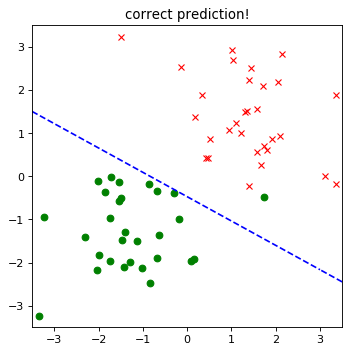

In [15]:


def boundary_points(w, b, x_plus, x_minus):
    display.clear_output(wait = True)
    plt.figure(figsize = (5, 5), dpi = 80)
    
    # draw points.
    plt.plot(x_plus[:, 0], x_plus[:, 1], 'rx')
    plt.plot(x_minus[:, 0], x_minus[:, 1], 'go')

    xlim = [-3.5, 3.5]
    ylim = xlim

    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    
    # draw boundary.
    x1 = np.linspace(xlim, 3)
    x2 = ( -b - w[0]*x1 ) / w[1]

    plt.plot(x1, x2, 'b--')
    
# Secondly, update w and b.
def update_boundary(x_plus, x_minus, w, b, rate):
    # positive or negative.
    choose = np.random.uniform(size = 1) > 0.5
    update = False
    if choose:
        # choose a point randomly.
        index = np.random.randint(x_plus.shape[0])
        cond = np.dot(w, x_plus[index, :]) + b 
        if cond < 0: # positive but less than 0.
            w += x_plus[index, :]*rate
            b += rate
            update = True
    else: 
        index = np.random.randint(x_minus.shape[0])
        cond = np.dot(w, x_minus[index, :]) + b 
        if cond > 0: #negative but bigger than 0.
            w -= x_minus[index, :]*rate
            b -= rate
            update = True
    return w, b, update

def run_perceptron():
    rate = 0.1
    w = 0.5*np.random.randn(2)
    b = 0.5*np.random.randn(1)
    
    x_plus = np.random.normal(loc = 1.3, size = (30, 2)) 
    x_minus = np.random.normal(loc = -1.3, size = (30, 2))
    
    for i in range(30):
        boundary_points(w, b, x_plus, x_minus)
        w, b, update = update_boundary(x_plus, x_minus, w, b, rate)
        print("this is the", i + 1, " iteration.")
        if update:
            plt.title("incorrect prediction!")
            plt.pause(1)
        else:
            plt.title("correct prediction!")
            plt.pause(1)
                
        
run_perceptron()

[[-0.64006867  2.67683437]]
0.99


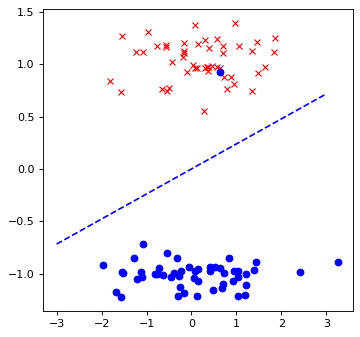

In [49]:
# sklearn 
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron

X, y = make_classification(n_samples=100, n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1)

X_plus, X_minus = X[y == 1], X[y == 0]

clf = Perceptron(fit_intercept=True, max_iter=100, shuffle=True)

clf.fit(X, y) # clf.coef_  clf.intercept_
print(clf.coef_)

result = clf.score(X, y)
print(result)

# plot points.
plt.figure(figsize = (5, 5), dpi = 80)
plt.plot(X_plus[:, 0], X_plus[:, 1], 'rx')
plt.plot(X_minus[:, 0], X_minus[:, 1], 'bo')

line_x = np.linspace(-3, 3, 100)

plt.plot(line_x, (-clf.coef_[0][0]/clf.coef_[0][1])*line_x, 'b--')


### 2. 优化算法：

#### 2.1 梯度下降 (BGD, SGD, MGD):

1. 批量梯度下降 BGD:


* 目标函数:

$$f(x_i) = mx_i + c$$

* 损失函数（n 为数据集样本数）:

$$E(m, c) = \sum_{i=1}^n (y_i - f(x_i))^2 $$

* Offset gradient:

$$\frac{\text{d}E(m, c)}{\text{d} c} = -2\sum_{i=1}^n (y_i - mx_i - c)$$

* Slope gradient:

$$\frac{\text{d}E(m, c)}{\text{d} m} = -2\sum_{i=1}^n x_i(y_i - mx_i - c)$$

* update parameters:

$$c_\text{new} \leftarrow c_{\text{old}} - \eta \frac{\text{d}E(m, c)}{\text{d}c}$$ 

$$m_\text{new} \leftarrow m_{\text{old}} - \eta \frac{\text{d}E(m, c)}{\text{d}m}$$


2. 随机梯度下降 SGD:


* 损失函数:

$$E(m, c) = (y_i - f(x_i))^2 $$

     
3. 小批量梯度下降 MGD:


* 损失函数（k 为每一个batch的样本数）:

$$E(m, c) = \sum_{i=1}^k (y_i - f(x_i))^2 $$

**一个函数在某点沿着梯度的方向增长最快，而逆着梯度的方向则减小最快**。

#### 2.2 三种梯度下降总结: 

1. 收敛现象：

    随机梯度下降以及小批量梯度下降是否会收敛? 不会，因此使用不固定的 learning rate 可以有效的改善算法不收敛的现象，例如：torch. optim. lr_scheduler。然而，大批量梯度下降一定会收敛，因此不需要更改 learning rate。

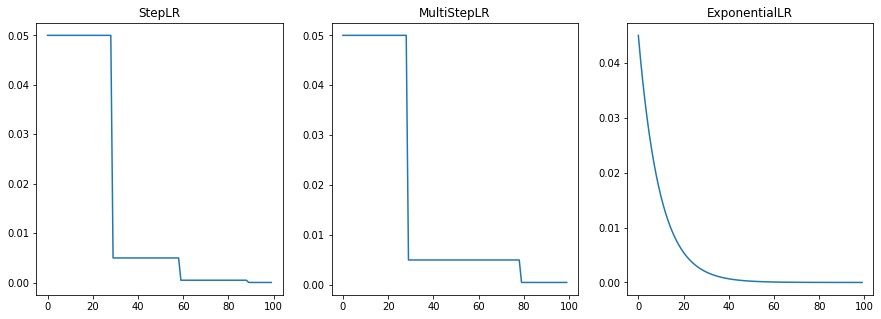

In [50]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision.models import AlexNet
import matplotlib.pyplot as plt

x = list(range(100))
y = []
plt.figure(figsize=(15, 5))
model = AlexNet(num_classes=2)
optimizer = optim.SGD(params=model.parameters(), lr=0.05)

# ----------------------------------------- 1. StepLR --------------------------------------------------------
scheduler = lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1) # lr*gamma every 30 epoch.

for epoch in range(100):
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])

plt.subplot(1, 3, 1)
plt.title("StepLR")
plt.plot(x, y)
# ---------------------------------------- 2. MultiStepLR ----------------------------------------------------
y.clear()
scheduler = lr_scheduler.MultiStepLR(optimizer, [30, 80], 0.1)
for epoch in range(100):
    scheduler.step()
    y.append(scheduler.get_lr()[0])

plt.subplot(1, 3, 2)
plt.title("MultiStepLR")
plt.plot(x, y)
# -------------------------------------- 3. ExponentialLR ----------------------------------------------------
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
y.clear()
for epoch in range(100):
    scheduler.step()
    y.append(scheduler.get_lr()[0])

plt.subplot(1, 3, 3)
plt.title("ExponentialLR")
plt.plot(x, y)


2. 训练速度:

    BGD 单次迭代时间过长，但是由于使用矩阵计算，因此当最后到达相同精确性的情况下，**BGD训练时间不一定最长**。相反，由于SGD或mini BGD在每次迭代中使用了更少的数据集，因此，可能需要更多次迭代才能到达全剧最优。注意，当训练集过大时，BGD不是一个很好的选择，考虑计算机内存。

#### 2.3 其他优化算法: 

1. 动量梯度下降 (Momentum):

    $$V_{dm_i} = \beta V_{dw_{i-1}} + (1 - \beta)  \nabla_m E(m, c) $$
    
    $$V_{dc_i} = \beta V_{dc_{i-1}} + (1 - \beta) \nabla_c E(m, c)$$
    
    将之前数据的梯度与要更新数据的梯度联系到一起，防止梯度过于抖动，不会存在急转弯的现象。
    

2. RMSprop (root mean square prop):
    
    \begin{cases}
          s = \beta s + (1 - \beta)dw^2\\
          w = w - \alpha \frac{dw}{\sqrt{s + \epsilon}}
    \end{cases}
    
    震荡较大方向上的梯度较大，对应s较大，梯度更新缓慢，从而减小震荡。反之，梯度较小，s较小，梯度更新增快。通常，$\beta$ 为0.999，$\epsilon$ 为 10e-8。
    

3. **Adam (Adaptive Moment Estimation)**:

    此算法为上述二者的结合，更新公式如下：
    
    \begin{cases}
          v = \beta v + (1 - \beta_1)dw\\
          s = \beta s + (1 - \beta_2)dw^2\\
          w = w - \alpha \frac{v}{\sqrt{s + \epsilon}}
    \end{cases}
    
    通常，$\beta_1$为0.9，$\beta_2$为0.999，$\epsilon$为10e-8。

    
https://ruder.io/optimizing-gradient-descent/index.html

https://www.cnblogs.com/jiaxblog/p/9695042.html

### 3. 推荐系统（使用SGD，BGD更新）: 

In [51]:
import pandas as pd
import numpy as np
import operator  
from functools import reduce

rating = pd.read_csv("./ml-latest-small/ratings.csv")
user_id_total = rating['userId'].unique()
np.random.seed(10)
user_id_ten = ( np.random.permutation(user_id_total.shape[0]) )[0: 10]
print(user_id_ten)

# two dimension
list_movie = [[] for _ in range(10)]
list_rating = [[] for _ in range(10)]
list_user = [[] for _ in range(10)]

# one dimension
list_movie_1D = []
list_rating_1D = []
list_user_1D = []
for i in range(0, 10):
    list_movie[i] = rating[rating.userId == user_id_ten[i]].movieId.values # change series to list
    list_movie_1D = np.append(list_movie_1D, list_movie[i])
    
    list_rating[i] = rating[rating.userId == user_id_ten[i]].rating.values 
    list_rating_1D = np.append(list_rating_1D, list_rating[i])
    
    list_user[i] = user_id_ten[i]*(np.ones(list_movie[i].shape[0]))
    list_user_1D = np.append(list_user_1D, list_user[i])

# create dataframe with NaN
list_movie_unique = np.unique(list_movie_1D) # list don't have unique().
n_movie = list_movie_unique.shape[0]

temp = np.zeros((n_movie, 10))
temp[:] = np.nan
Y_with_NaN = pd.DataFrame(temp)

for i in range(10):
    local_movie = list_movie[i]
    ixs = np.in1d(list_movie_unique, local_movie)
    Y_with_NaN.loc[ixs, i] = list_rating_1D[i]

Y_with_NaN.index = list_movie_unique
Y_with_NaN.columns = user_id_ten

# create dataframe without NaN
list_rating_without_mean = list_rating_1D - np.mean(list_rating_1D)
Y = pd.DataFrame({
    'users': list_user_1D,
    'movies': list_movie_1D,
    'ratingOrg': list_rating_1D,
    'rating': list_rating_without_mean
})

print(Y.head())

[547 241 277 348 218 407 352  97 381 607]
   users  movies  ratingOrg    rating
0  547.0   541.0        5.0  1.247744
1  547.0  1131.0        4.0  0.247744
2  547.0  1189.0        4.0  0.247744
3  547.0  1199.0        5.0  1.247744
4  547.0  1211.0        5.0  1.247744


In [52]:
# initilization U, V (user feature matrix, movie feature matrix)
q = 2 # the size of feature vector of user and movie.
learn_rate = 0.01
U = pd.DataFrame(np.random.normal(size=(10, q))*0.001, index=user_id_ten)
V = pd.DataFrame(np.random.normal(size=(n_movie, q))*0.001, index=list_movie_unique)

In [53]:
def BGD(Y, U, V):
    gU = pd.DataFrame(np.zeros(U.shape), index = U.index)
    gV = pd.DataFrame(np.zeros(V.shape), index = V.index)
    obj =  0.
    for i in range(Y.shape[0]):
        row = Y.iloc[i]
        user = row['users']
        movie = row['movies']
        rating = row['rating']
        prediction = np.dot(U.loc[user], V.loc[movie])
        diff = prediction - rating
        obj += diff*diff
        gU.loc[user] += 2*diff*V.loc[movie]
        gV.loc[movie] += 2*diff*U.loc[user]
    return obj, gU, gV

def run_BGD(Y, U, V):
    for i in range(25): 
        obj, gU, gV = BGD(Y, U, V)
        U -= learn_rate*gU
        V -= learn_rate*gV
        print("This is the ",i+1,"times. Loss function is : ", obj)
    
run_BGD(Y, U, V)

This is the  1 times. Loss function is :  974.1815315269604
This is the  2 times. Loss function is :  974.1813241944535
This is the  3 times. Loss function is :  974.1811741786859
This is the  4 times. Loss function is :  974.1810063361511
This is the  5 times. Loss function is :  974.1807563192532
This is the  6 times. Loss function is :  974.180335394607
This is the  7 times. Loss function is :  974.1795919042527
This is the  8 times. Loss function is :  974.1782497489015
This is the  9 times. Loss function is :  974.175797112984
This is the  10 times. Loss function is :  974.1712787641126
This is the  11 times. Loss function is :  974.1629051027189
This is the  12 times. Loss function is :  974.1473139583452
This is the  13 times. Loss function is :  974.1181741550301
This is the  14 times. Loss function is :  974.0635405312855
This is the  15 times. Loss function is :  973.9608399010845
This is the  16 times. Loss function is :  973.7673638408212
This is the  17 times. Loss functio

In [54]:
# create diff_arr for calculating loss function.
import random
diff_arr = np.zeros(Y.shape[0])
for i in range(Y.shape[0]):
    row = Y.iloc[i]
    user = row['users']
    movie = row['movies']
    rating = row['rating']
    prediction = np.dot(U.loc[user], V.loc[movie]) 
    diff_arr[i] = (prediction - rating)**2
    
def SGD(Y, U, V):
    # Attention: after update U and V, gU and gV should be reset.
    gU = pd.DataFrame(np.zeros(U.shape), index = U.index)
    gV = pd.DataFrame(np.zeros(V.shape), index = V.index)
    obj =  []
    arr = range(Y.shape[0])
    i = random.sample(arr, 1)[0] # random select one sample.
    row = Y.iloc[i]
    user = row['users']
    movie = row['movies']
    rating = row['rating']
    prediction = np.dot(U.loc[user], V.loc[movie])
    diff = prediction - rating
    diff_arr[i] = diff**2 
    gU.loc[user] += 2*diff*V.loc[movie]
    gV.loc[movie] += 2*diff*U.loc[user]
    return diff_arr, gU, gV

def run_SGD(Y, U, V):
    for i in range(800):
        diff_arr, gU, gV = SGD(Y, U, V)
        U -= learn_rate*gU
        V -= learn_rate*gV
    print("Loss function is : ", diff_arr.sum())
    
for i in range(10):
    run_SGD(Y, U, V)

Loss function is :  773.3773831204736
Loss function is :  737.3288670744331
Loss function is :  701.4184249002616
Loss function is :  659.8665177650126
Loss function is :  613.2959402967797
Loss function is :  573.1278498822403
Loss function is :  539.8482996708508
Loss function is :  501.45253818971116
Loss function is :  464.6324443056561
Loss function is :  425.09300161176697
